In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784.00,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.60,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.40,1


In [4]:
# for getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


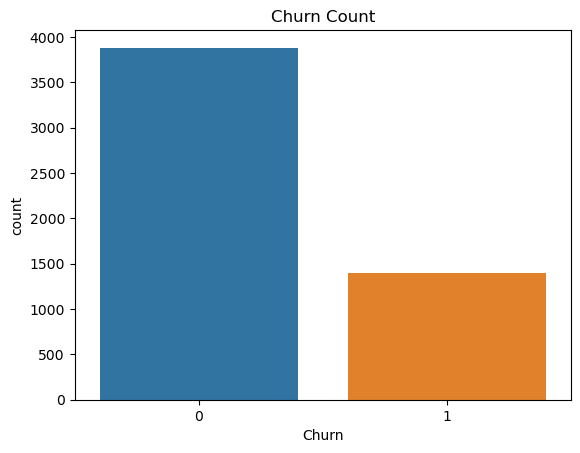

In [5]:
# To visualise chrning trends
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

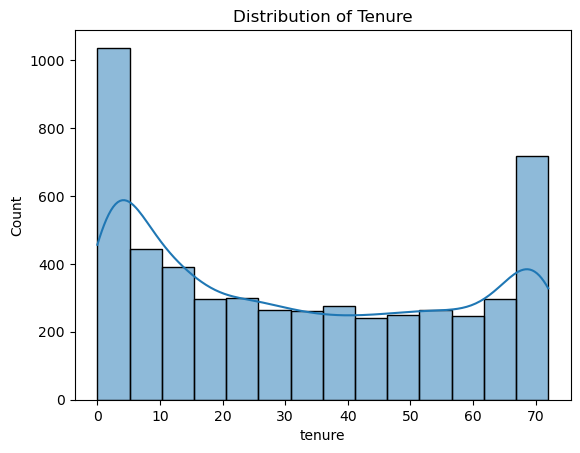

In [6]:
# To visualise the churning trends as per distribution of Tenure
sns.histplot(data=df, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.show()

# Obsevation
    # Either New or Old customers are churning more, Customers
    # Customers with Tenure 25 to 65 are somewhat stable as compared to very new and very old customers

In [7]:
columns_to_encode = ['InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [8]:
df_encoded.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,No,Yes,...,53.65,3784.00,0,0,0,0,1,1,0,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,No,No,...,46.00,193.60,1,0,0,0,0,0,0,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No internet service,No internet service,...,21.20,1238.65,0,0,1,1,0,0,0,1


In [9]:
df=df_encoded

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5282 non-null   object 
 1   gender                                 5282 non-null   object 
 2   SeniorCitizen                          5282 non-null   int64  
 3   Partner                                5282 non-null   object 
 4   Dependents                             5282 non-null   object 
 5   tenure                                 5282 non-null   int64  
 6   PhoneService                           5282 non-null   object 
 7   MultipleLines                          5282 non-null   object 
 8   OnlineSecurity                         5282 non-null   object 
 9   OnlineBackup                           5282 non-null   object 
 10  DeviceProtection                       5282 non-null   object 
 11  Tech

In [11]:
# Treating dichotomous & Nominal data
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 0, 'No': 0, 'Yes': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5282 non-null   object 
 1   gender                                 5282 non-null   object 
 2   SeniorCitizen                          5282 non-null   int64  
 3   Partner                                5282 non-null   int64  
 4   Dependents                             5282 non-null   int64  
 5   tenure                                 5282 non-null   int64  
 6   PhoneService                           5282 non-null   int64  
 7   MultipleLines                          5282 non-null   int64  
 8   OnlineSecurity                         5282 non-null   int64  
 9   OnlineBackup                           5282 non-null   int64  
 10  DeviceProtection                       5282 non-null   int64  
 11  Tech

In [13]:
df = df.drop(columns=['customerID','TotalCharges', 'gender'])

In [14]:
df['tenure']=np.log(df['tenure']+1)
df['MonthlyCharges']=np.log(df['MonthlyCharges']+1)

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

In [16]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,1.085379,0,0,0,1,0,1,...,0,-0.075115,0,0,0,0,1,1,0,0
1,0,0,0,-1.231954,1,0,0,0,0,0,...,1,-0.334876,1,0,0,0,0,0,0,1
2,0,0,1,0.871533,1,0,0,0,0,0,...,1,-1.626868,0,0,1,1,0,0,0,1
3,0,0,0,0.871533,1,1,0,1,0,1,...,1,0.885459,1,1,0,0,0,0,1,0
4,0,0,0,-0.632835,1,0,0,0,0,0,...,1,0.593103,1,1,0,0,0,0,1,0


In [17]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f'Unique values in column "{column}": {values}')

Unique values in column "SeniorCitizen": [0 1]
Unique values in column "Partner": [1 0]
Unique values in column "Dependents": [1 0]
Unique values in column "tenure": [ 1.08537913 -1.23195445  0.87153256 -0.63283459  0.93015483  0.91586777
 -2.02394782  1.01124681  0.34508971  0.1930591  -0.40606076 -0.22658825
  0.79217895  0.47433705 -0.03371473  0.74081648 -0.9411256   0.52106991
  0.97165147  1.02405219  0.66721057 -1.42482797  0.08708812 -1.67348517
  0.44998763  0.39912901  0.42493233 -0.47524546  1.07345691  0.8247997
 -0.07804995  0.84065973  0.64778621  0.1238744   0.58674811  0.62791529
  0.37253161  0.80864321  0.99824887  1.04910749 -0.72390266  0.72299426
  0.90134059  0.22567984 -1.07436532  1.03667062 -0.82570811  0.00845691
  0.7047968   0.60757677 -0.17418752 -0.5504535  -0.28237194  0.98505247
  0.68620797  0.15915878  0.56540512  0.77539498  0.88656506  0.54352175
 -0.12478281 -0.34200574  0.94420957  0.31674792  0.49801928  0.85623397
  1.06136794  0.04866636  0.7582

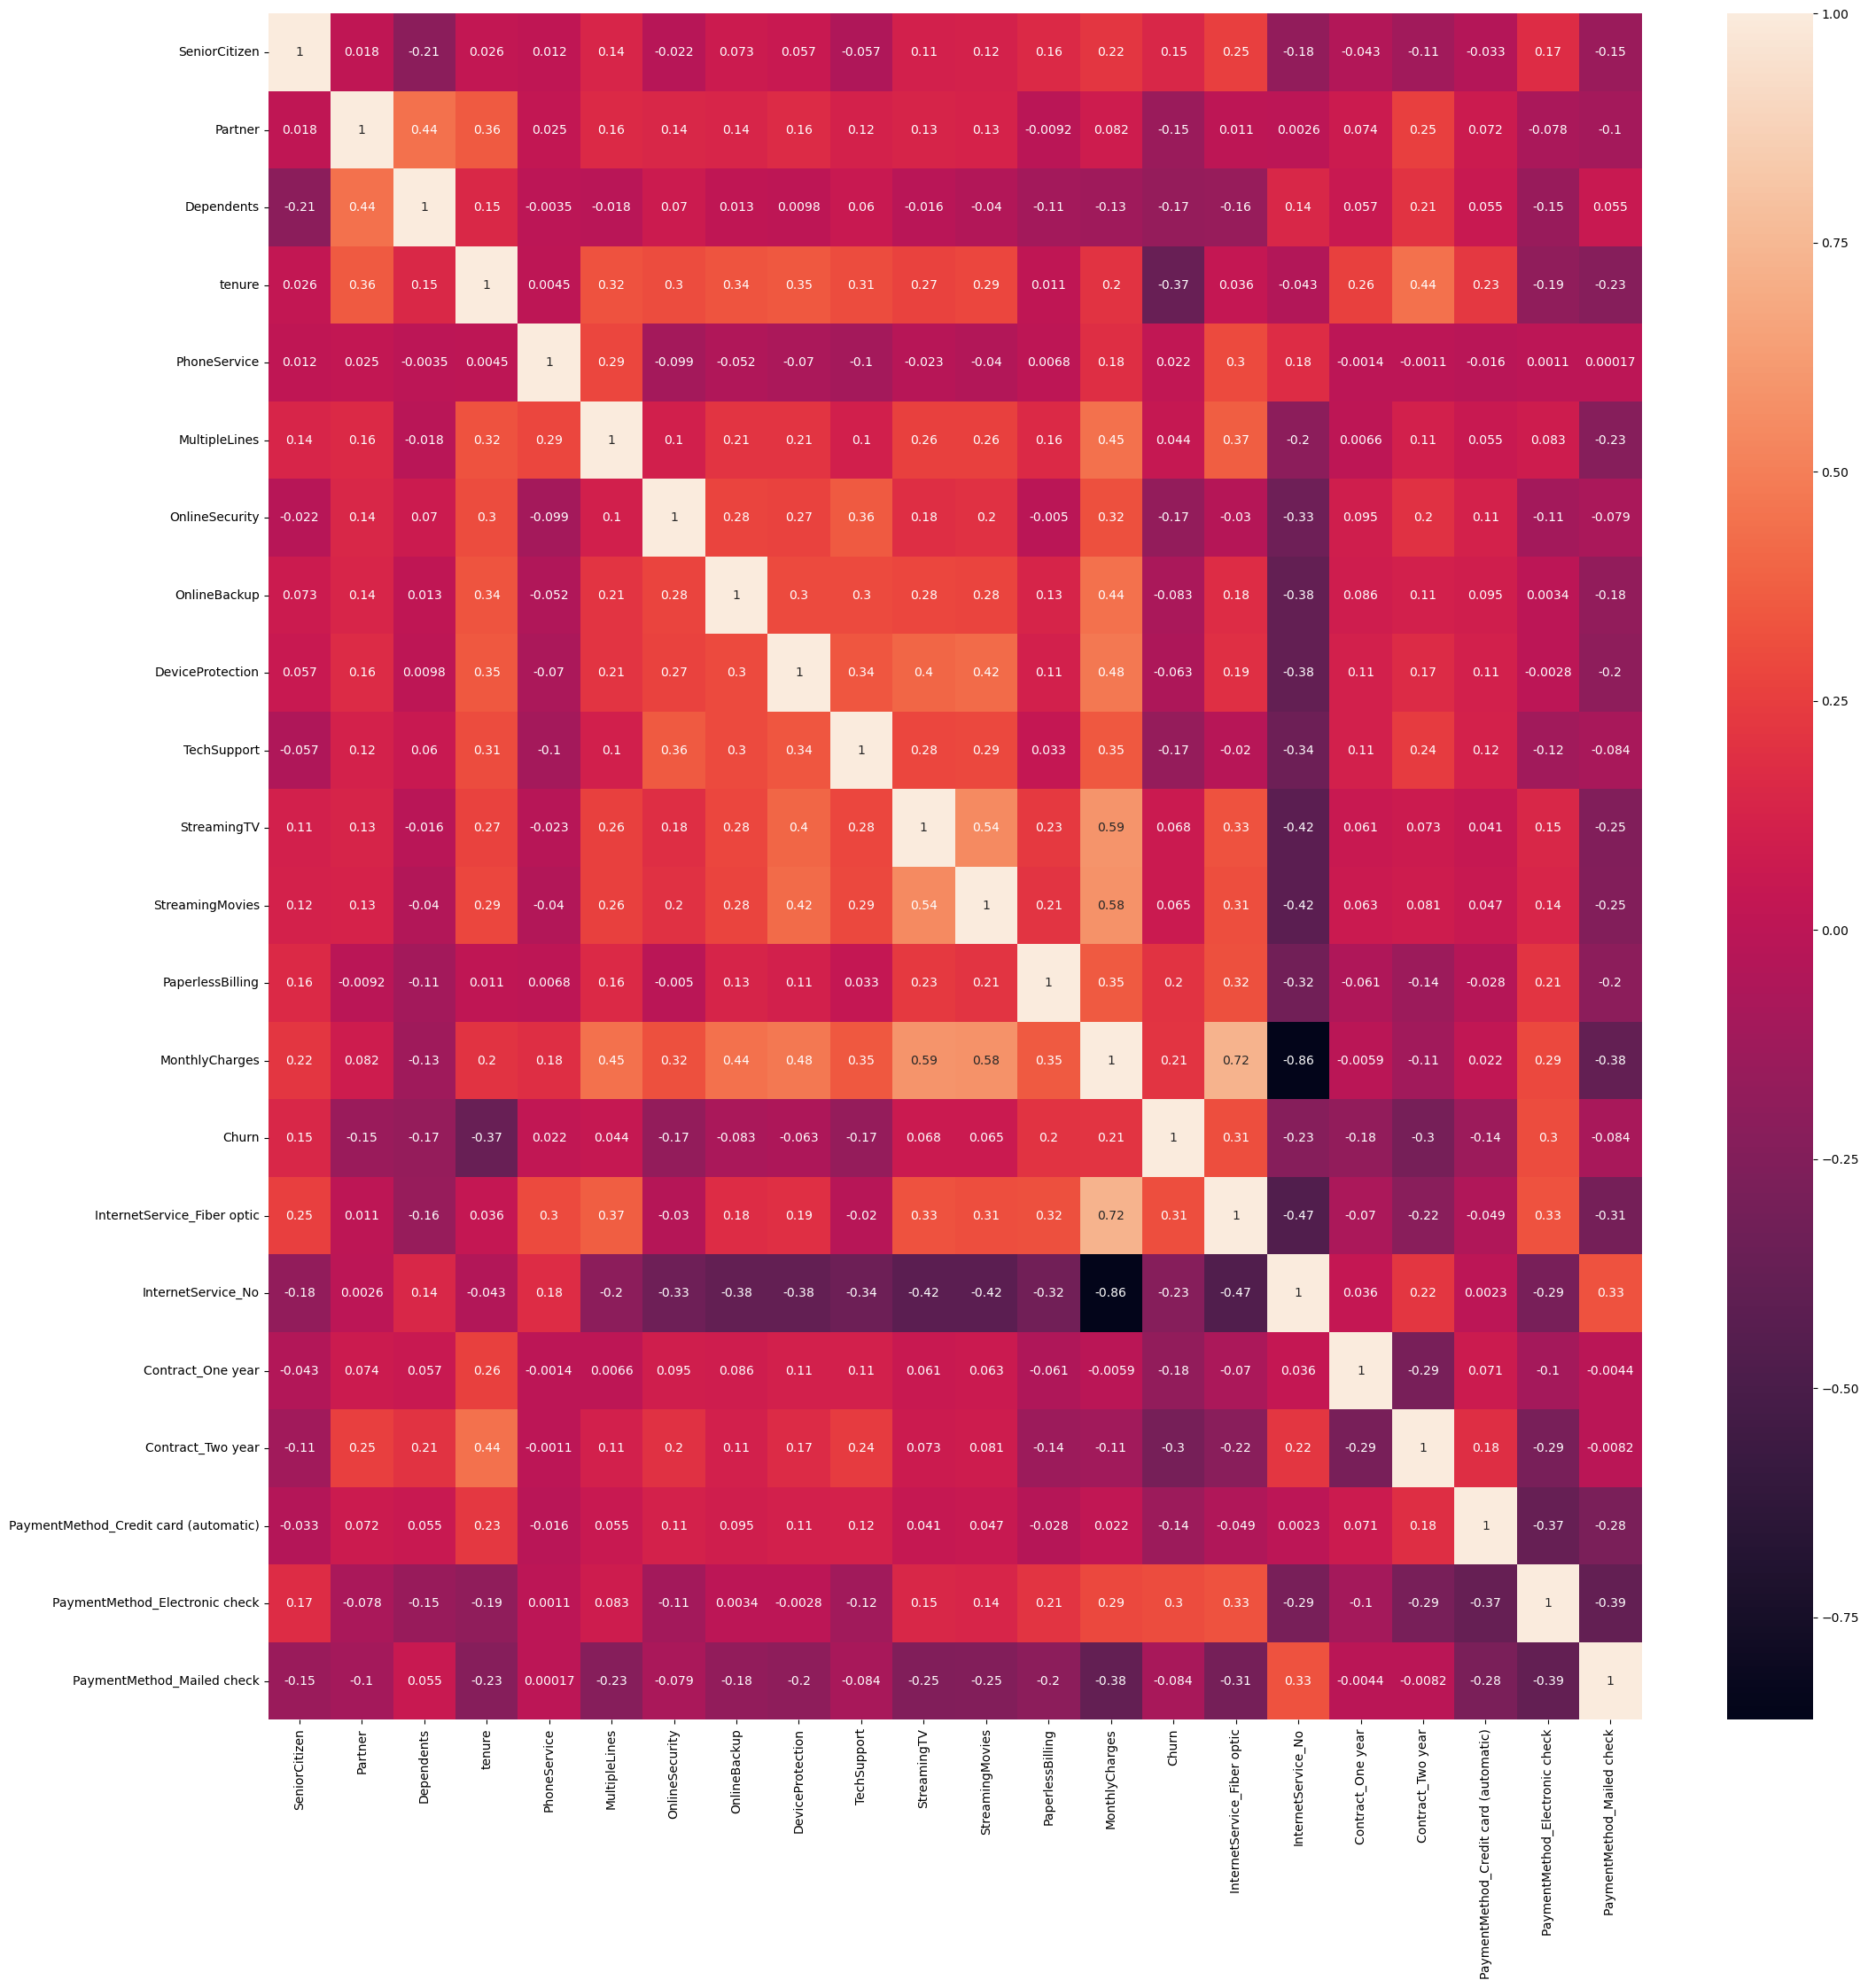

In [18]:
# TO visualize corelation

plt.figure(figsize = (25, 25))
sns.heatmap(df.corr(), annot = True)
plt.savefig("heatmap.png")
plt.show()

<Axes: >

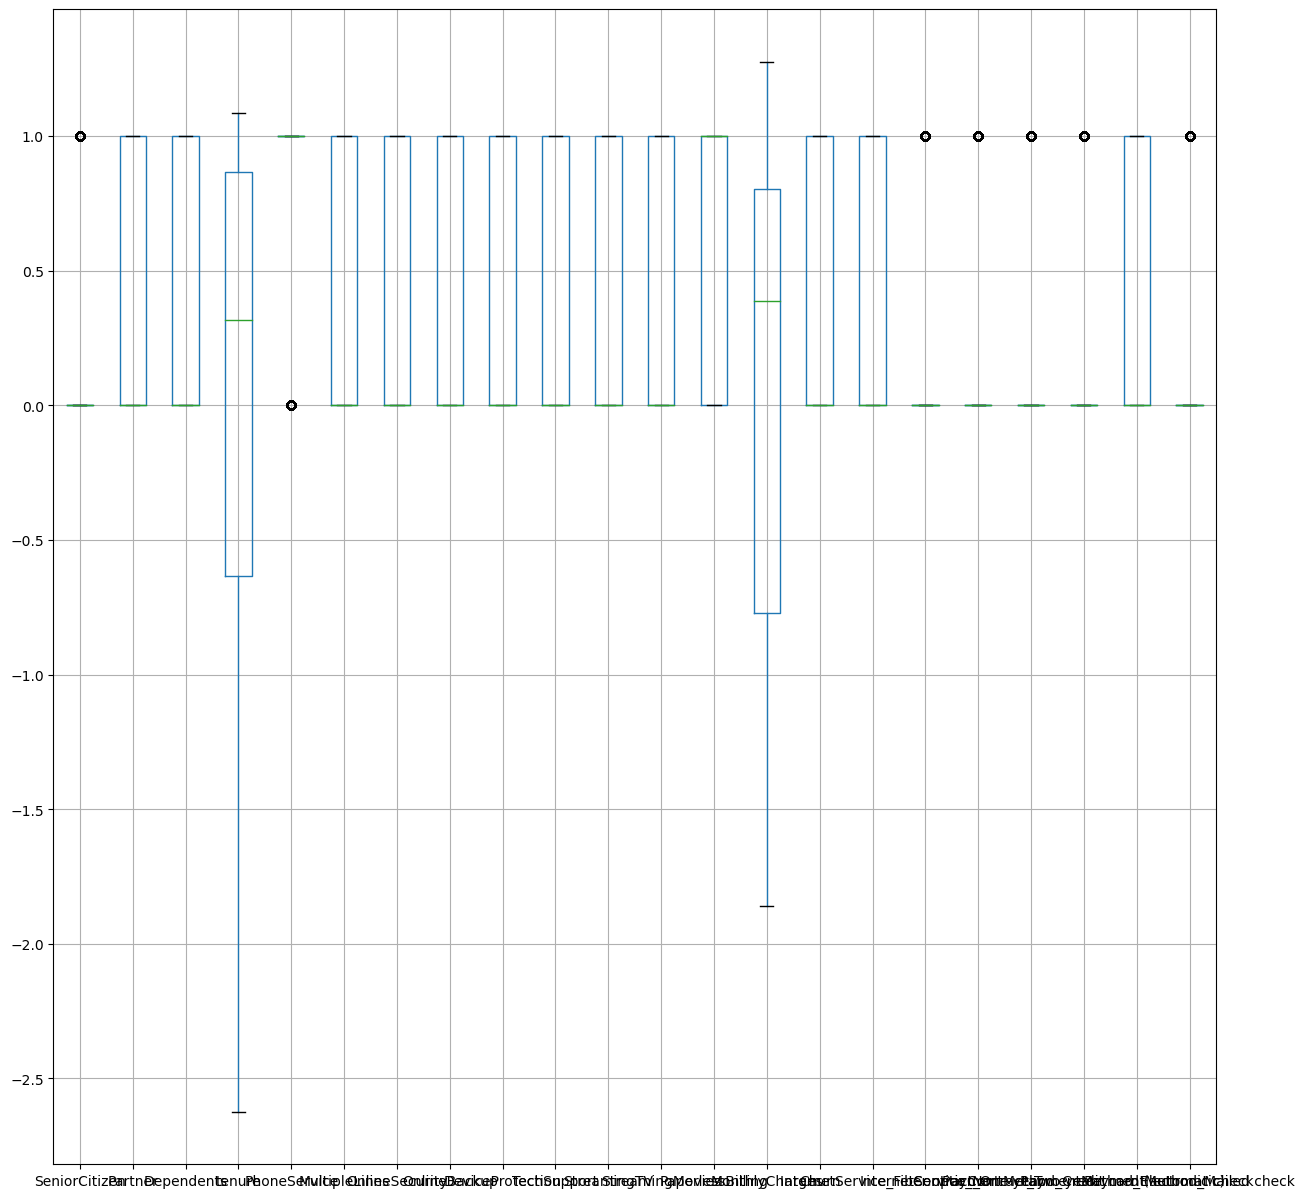

In [19]:
# To check for any outlier presence
plt.figure(figsize = (15, 15))
df.boxplot()

In [20]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 35


In [21]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (5282, 22)
After (5247, 22)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=13)

In [24]:
len(df_test), len(df_train)

(1050, 4197)

In [25]:
y_train = df_train.Churn
y_test = df_test.Churn

In [26]:
X_train = df_train.drop(['Churn'], axis = True)
X_test = df_test.drop(['Churn'], axis = True)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.8342857142857143

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.73
Recall: 0.58
F1 Score: 0.65


In [34]:
new_data = pd.read_csv('active_customers.csv')

In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [36]:
columns_to_encode_new = ['InternetService', 'Contract', 'PaymentMethod']
new_data_encoded_new = pd.get_dummies(new_data, columns=columns_to_encode, drop_first=True)

In [37]:
new_data_encoded_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             1761 non-null   object 
 1   gender                                 1761 non-null   object 
 2   SeniorCitizen                          1761 non-null   int64  
 3   Partner                                1761 non-null   object 
 4   Dependents                             1761 non-null   object 
 5   tenure                                 1761 non-null   int64  
 6   PhoneService                           1761 non-null   object 
 7   MultipleLines                          1761 non-null   object 
 8   OnlineSecurity                         1761 non-null   object 
 9   OnlineBackup                           1761 non-null   object 
 10  DeviceProtection                       1761 non-null   object 
 11  Tech

In [38]:
new_data = new_data_encoded_new

In [39]:
new_data['Partner'] = new_data['Partner'].replace({'Yes': 1, 'No': 0})
new_data['Dependents'] = new_data['Dependents'].replace({'Yes': 1, 'No': 0})
new_data['PhoneService'] = new_data['PhoneService'].replace({'Yes': 1, 'No': 0})
new_data['MultipleLines'] = new_data['MultipleLines'].replace({'No phone service': 0, 'No': 0, 'Yes': 1})
new_data['OnlineSecurity'] = new_data['OnlineSecurity'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['OnlineBackup'] = new_data['OnlineBackup'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['DeviceProtection'] = new_data['DeviceProtection'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['TechSupport'] = new_data['TechSupport'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['StreamingTV'] = new_data['StreamingTV'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['StreamingMovies'] = new_data['StreamingMovies'].replace({'No internet service': 0, 'Yes': 1, 'No': 0})
new_data['PaperlessBilling'] = new_data['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

In [40]:
new_data = new_data.drop(columns=['customerID','TotalCharges', 'gender'])

In [41]:
new_data['tenure']=np.log(new_data['tenure']+1)
new_data['MonthlyCharges']=np.log(new_data['MonthlyCharges']+1)

In [42]:
predictions = model.predict(new_data)

In [43]:
new_data['Predicted_Churn'] = predictions

In [44]:
original_data = pd.read_csv('active_customers.csv')

In [45]:
customer_ids = original_data['customerID']

In [46]:
new_data['CustomerID'] = customer_ids

In [47]:
new_data.to_csv('predicted_churn_active_customers.csv', index=False)